### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [12]:
HISTORY_FILE = 'test_data/history_file_static_try3.json'

In [13]:
history = []
with jsonlines.open(HISTORY_FILE) as reader:
    for obj in reader:
        history.append(obj)

Functions to process the history

In [14]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    return [(entry['item'], entry['score']) for entry in result_structs]
        

Get the individual data frames and result lists

In [15]:
fair_df, compat_df, alloc_df, results = process_history(history)

In [16]:
fair_df

,Agent1,Agent2
0,1.000000,1.000000
1,1.000000,0.000000
2,0.800000,0.700000
3,0.666667,0.866667
4,0.833333,0.650000
5,0.666667,0.880000
6,0.577778,1.000000
7,0.685714,0.857143
8,0.616667,0.975000
9,0.548148,1.000000


In [17]:
compat_df

,Agent1,Agent2
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [18]:
alloc_df

,Agent1,Agent2
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [19]:
results[0]

[('45', 1.478120837710086),
 ('27', 1.4406997518869722),
 ('23', 1.4159817921699855),
 ('17', 1.410983500340931),
 ('51', 1.389159417795204),
 ('14', 1.3425811815646007),
 ('100', 1.317279736462317),
 ('13', 1.302401278854416),
 ('35', 1.2943394540204332),
 ('81', 1.291360436005951)]

## Visualizations

Simple plot of the fairness values computed at each iteration

<Axes: xlabel='index', ylabel='value'>

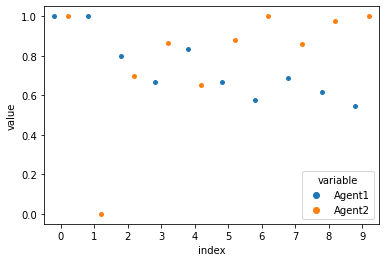

In [20]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

Same for allocation

<Axes: xlabel='index', ylabel='value'>

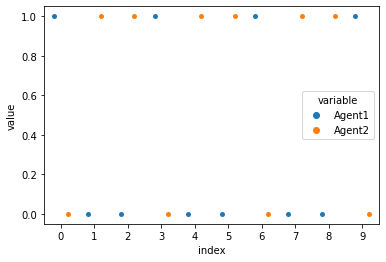

In [21]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)